### NAME : HARENSHYLAK M K

## GRIP - The Sparks Foundation (Data Science & Business Analytics Internship)

### TASK#1 - Prediction using Supervised ML


Predict the percentage of an student based on the no. of study hours.This is a simple linear regression task as it involves just two variables.


DATASET - http://bit.ly/w-data

In [63]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [64]:
# Reading data from given link
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [71]:
#Check for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [72]:
#Checking size of dataset
df.shape

(25, 2)

In [73]:
#Checking all column names of dataset
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [74]:
#Describing the dataset 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


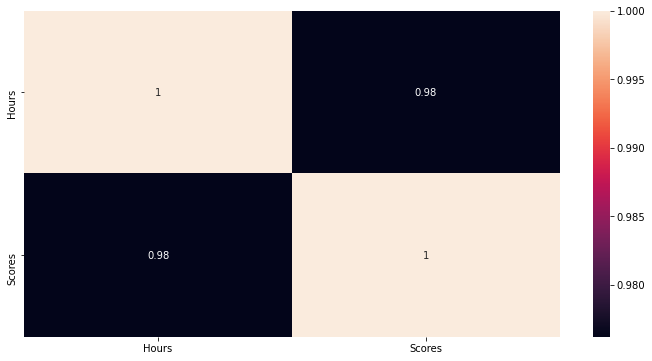

In [75]:
#Finding correlation between hours and scores
corr=df.corr()
plt.subplots(figsize=(12,6))
fig = sns.heatmap(corr, annot=True)

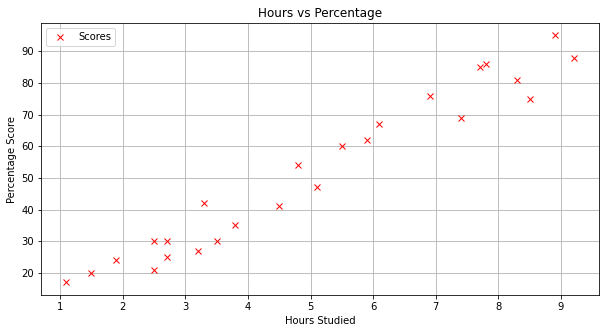

In [77]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o',color='red',marker='x',figsize=(10,5))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

###### From the graph above, we can see that there is a positive linear relation between the no of hours studied and the percentage of score.

### Preparing the data

In [79]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

Now we have to split this data into training and test sets

In [80]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Algorithm

In [81]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


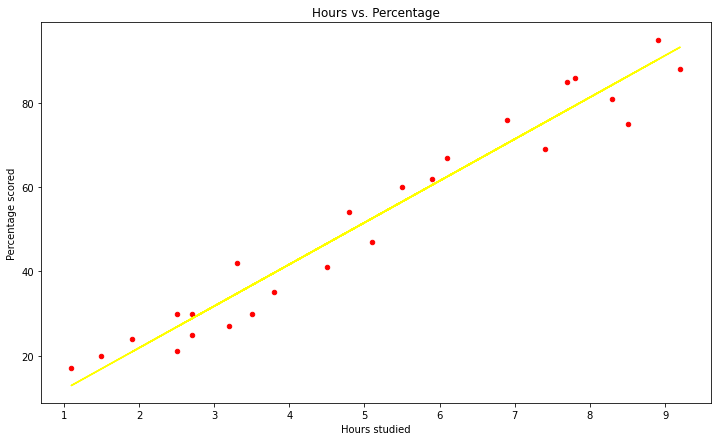

In [82]:
# Plotting the regression line
df.plot(kind="scatter", x="Hours", y="Scores", figsize=(12,7), color='red')
line = regressor.coef_[0]*X_train + regressor.intercept_
plt.plot(X_train, line,color='yellow')
plt.title('Hours vs. Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

### Making Predictions

In [83]:
y_pred = regressor.predict(X_test) # Predicting the scores
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [91]:
# Comparing the actual and predicted scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

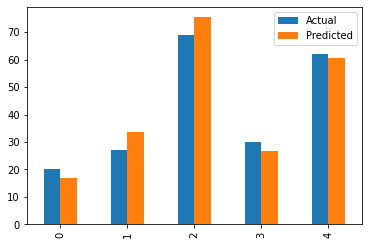

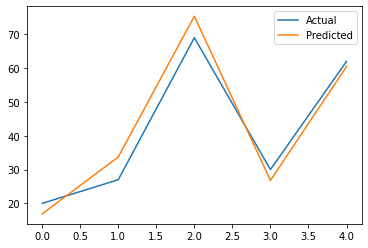

In [88]:
# Plot graphs comparing actual and predicted data (using bar and line graphs)
df.plot(kind = "bar")
df.plot()

In [92]:
# Checking how much score one will get for the no of hours they have studied
hours = [[6.75]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[6.75]]
Predicted Score = 68.91509128576978


#### We can find the scores of the student from no of hours they have studied

### Evaluating the model

Mean absolute error and Root mean squared error are some of the best methods to evaluate this model

In [89]:
from sklearn import metrics  
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE): 4.183859899002975
Root Mean Squared Error(RMSE): 4.6474476121003665
